In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from sklearn.model_selection import train_test_split

def prepare_data():
    x = np.linspace(0, 1, 100)
    y = np.cos(1.5 * np.pi * x)

    np.random.seed(14300631)
    x_samples = np.random.uniform(0, 1, size=60)
    y_samples = np.cos(1.5 * np.pi * x_samples) + np.random.normal(scale=0.1, size=x_samples.shape)

    df = pd.DataFrame({"x": x_samples, "y": y_samples})

    df_remain, df_online_test = train_test_split(df, test_size=10)
    df_remain, df_test = train_test_split(df_remain, test_size=10)
    df_train, df_val = train_test_split(df_remain, test_size=10)
    return {
        "train": df_train,
        "val": df_val,
        "test": df_test,
        "online_test": df_online_test,
        "real": pd.DataFrame({"x": x, "y": y})
    }

In [ ]:
data = prepare_data()

In [ ]:
data.keys()

dict_keys(['train', 'val', 'test', 'online_test', 'real'])

In [ ]:
train_df = data["train"]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 57 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       30 non-null     float64
 1   y       30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


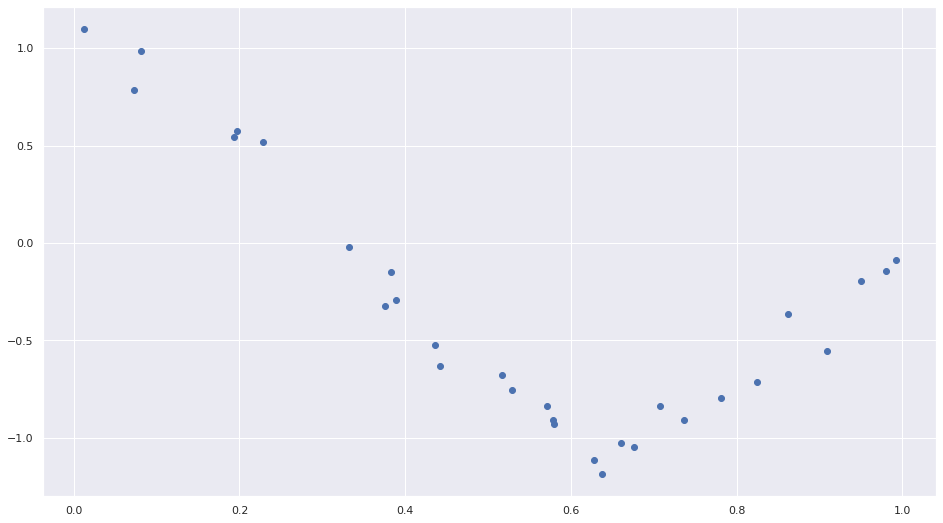

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(train_df["x"], train_df["y"])

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_df["x"].values.reshape(-1, 1), train_df["y"])

LinearRegression()

In [ ]:
train_predictions = model.predict(train_df["x"].values.reshape(-1, 1))

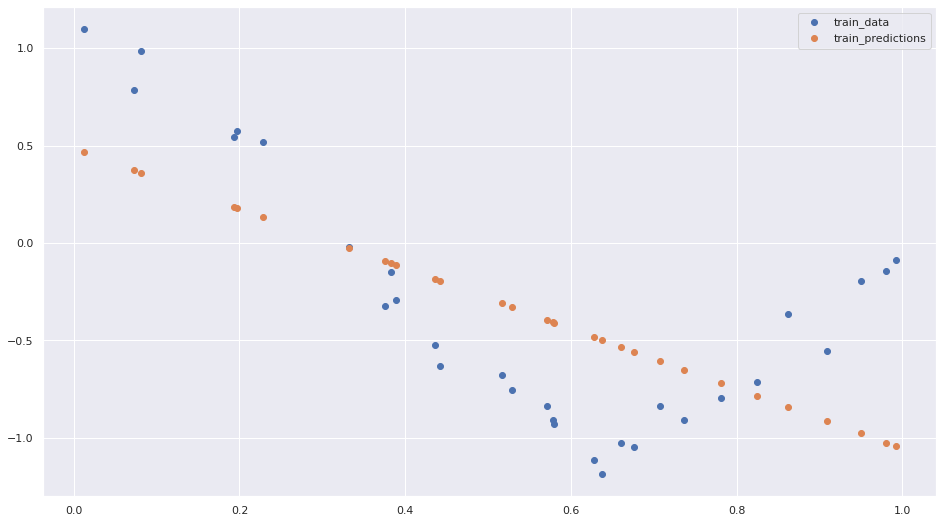

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(train_df["x"], train_df["y"], label="train_data")
ax.scatter(train_df["x"], train_predictions, label="train_predictions")
ax.legend()

In [ ]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(train_df["y"], train_predictions)
print(f"Train MSE (one feature) = {train_mse}")

Train MSE (one feature) = 0.23216550460679047


In [ ]:
train_df["x2"] = train_df["x"] ** 2

In [ ]:
model = LinearRegression()
model.fit(train_df[["x", "x2"]], train_df["y"])

LinearRegression()

In [ ]:
train_predictions = model.predict(train_df[["x", "x2"]])

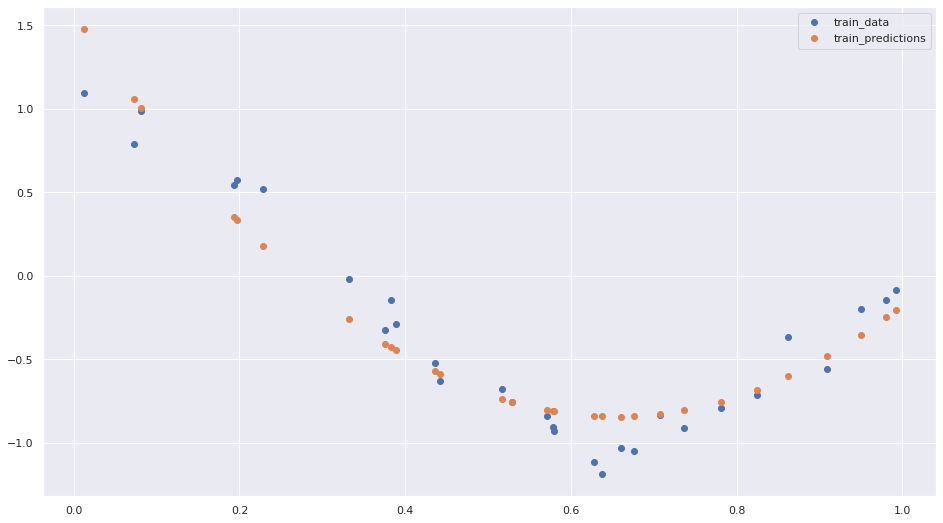

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(train_df["x"], train_df["y"], label="train_data")
ax.scatter(train_df["x"], train_predictions, label="train_predictions")
ax.legend()

In [ ]:
train_mse = mean_squared_error(train_df["y"], train_predictions)
print(f"Train MSE (two features) = {train_mse}")

Train MSE (two features) = 0.0341204149217871


In [ ]:
train_df["x3"] = train_df["x"] ** 3

model = LinearRegression()
model.fit(train_df[["x", "x2", "x3"]], train_df["y"])
train_predictions = model.predict(train_df[["x", "x2", "x3"]])

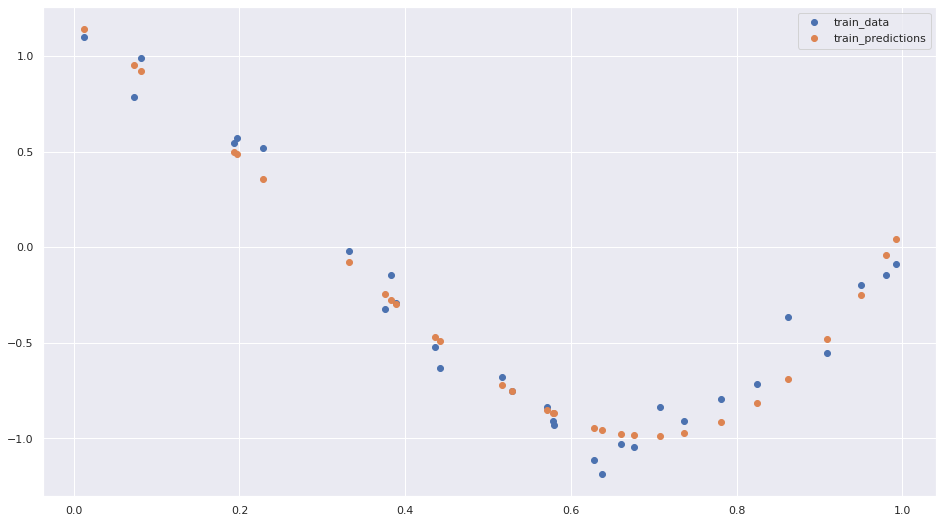

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(train_df["x"], train_df["y"], label="train_data")
ax.scatter(train_df["x"], train_predictions, label="train_predictions")
ax.legend()

In [ ]:
train_mse = mean_squared_error(train_df["y"], train_predictions)
print(f"Train MSE (three features) = {train_mse}")

Train MSE (three features) = 0.013534919906352555


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

max_degree = 21
train_mses = []
for i in range(1, 21):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X = poly.fit_transform(train_df[["x"]])
    model = LinearRegression().fit(X, train_df["y"])
    train_predictions = model.predict(X)
    train_mses.append(mean_squared_error(train_df["y"], train_predictions))

fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(range(1, max_degree), train_mses)
ax.set_yscale('log')

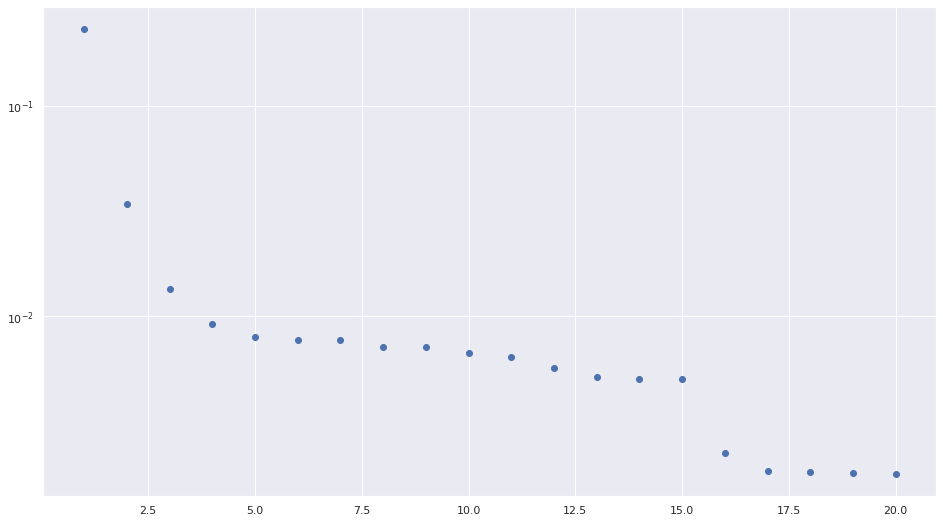

In [ ]:
train_mses[-1]

0.001778347313239131

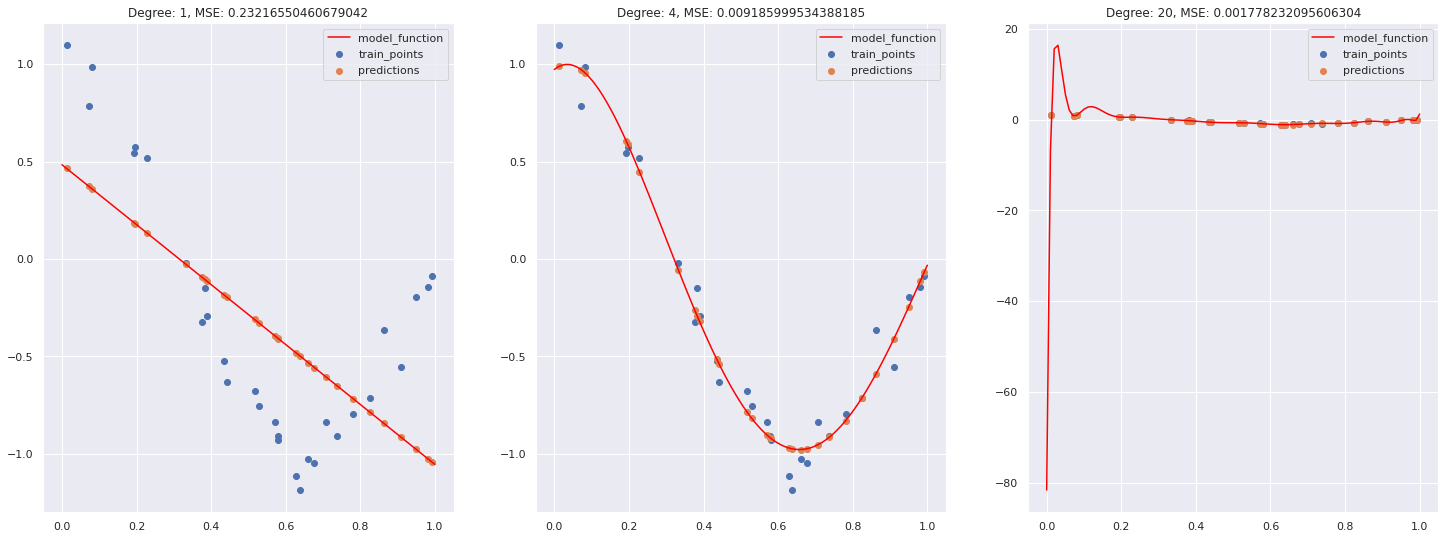

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25, 9))
for ax, degree in zip(axes, [1, 4, 20]):
    poly = PolynomialFeatures(degree=degree)
    X = poly.fit_transform(train_df[["x"]])
    model = LinearRegression().fit(X, train_df["y"])
    train_predictions = model.predict(X)
    train_mse = mean_squared_error(train_df["y"], train_predictions)

    xspace = np.linspace(0, 1, 100)
    Xspace = poly.fit_transform(xspace.reshape(-1, 1))
    yspace = model.predict(Xspace)

    ax.scatter(train_df["x"], train_df["y"], label="train_points")
    ax.scatter(train_df["x"], train_predictions, label="predictions")
    ax.plot(xspace, yspace, label="model_function", color="red")
    ax.set_title(f"Degree: {degree}, MSE: {train_mse}")
    ax.legend()
plt.show()

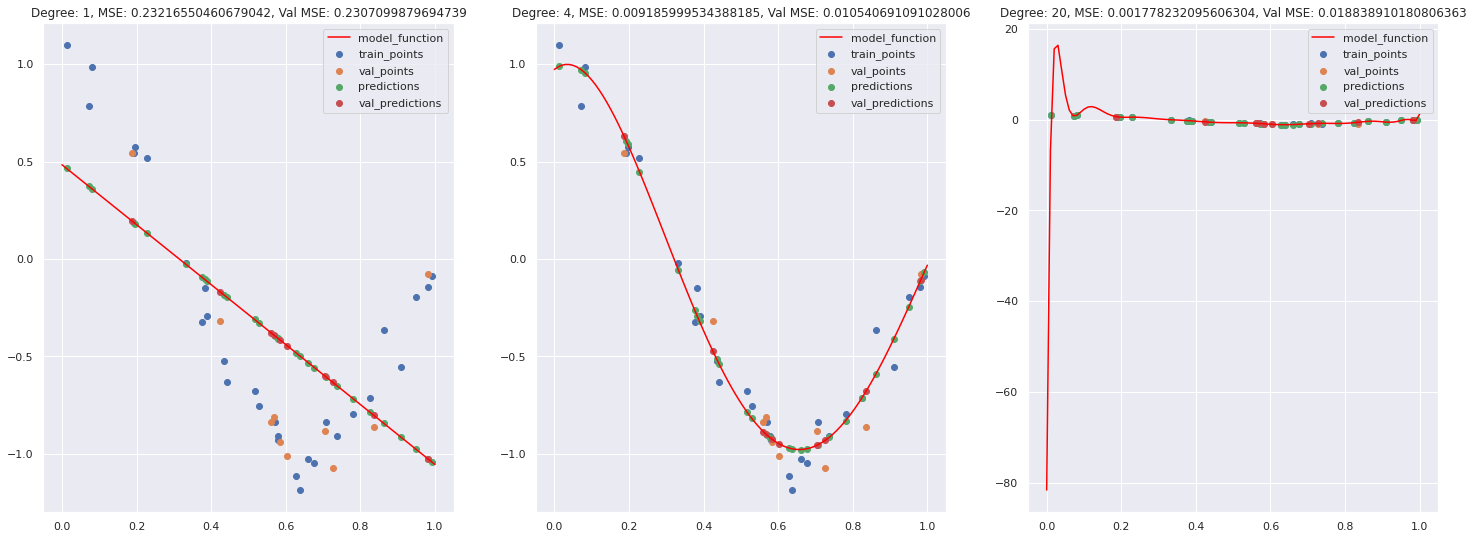

In [ ]:
val_df = data["val"]

fig, axes = plt.subplots(1, 3, figsize=(25, 9))
for ax, degree in zip(axes, [1, 4, 20]):
    poly = PolynomialFeatures(degree=degree)
    X = poly.fit_transform(train_df[["x"]])
    model = LinearRegression().fit(X, train_df["y"])
    train_predictions = model.predict(X)
    train_mse = mean_squared_error(train_df["y"], train_predictions)

    xspace = np.linspace(0, 1, 100)
    Xspace = poly.fit_transform(xspace.reshape(-1, 1))
    yspace = model.predict(Xspace)

    X_val = poly.fit_transform(val_df[["x"]])
    val_predictions = model.predict(X_val)
    val_mse = mean_squared_error(val_df["y"], val_predictions)

    ax.scatter(train_df["x"], train_df["y"], label="train_points")
    ax.scatter(val_df["x"], val_df["y"], label="val_points")

    ax.scatter(train_df["x"], train_predictions, label="predictions")
    ax.scatter(val_df["x"], val_predictions, label="val_predictions")
    
    ax.plot(xspace, yspace, label="model_function", color="red")
    ax.set_title(f"Degree: {degree}, MSE: {train_mse}, Val MSE: {val_mse}")
    ax.legend()
plt.show()

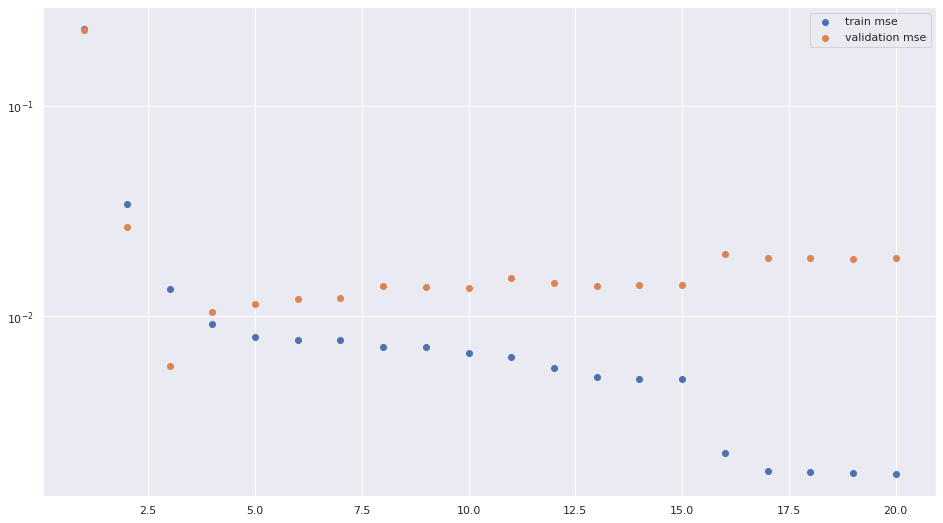

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

max_degree = 21
train_mses = []
val_mses = []
for i in range(1, 21):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X = poly.fit_transform(train_df[["x"]])
    model = LinearRegression().fit(X, train_df["y"])
    train_predictions = model.predict(X)
    train_mses.append(mean_squared_error(train_df["y"], train_predictions))

    X_val = poly.fit_transform(val_df[["x"]])
    val_predictions = model.predict(X_val)
    val_mses.append(mean_squared_error(val_df["y"], val_predictions))

fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(range(1, max_degree), train_mses, label="train mse")
ax.scatter(range(1, max_degree), val_mses, label="validation mse")
ax.legend()
ax.set_yscale('log')

# Boston Housing dataset

http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [ ]:
!wget https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

--2022-10-15 14:17:19--  https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35735 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  34.90K  --.-KB/s    in 0.002s  

2022-10-15 14:17:19 (18.7 MB/s) - ‘BostonHousing.csv’ saved [35735/35735]



In [ ]:
df = pd.read_csv("BostonHousing.csv")

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
from sklearn.model_selection import train_test_split

trainval_df, test_df = train_test_split(df, test_size=0.1)
train_df, val_df = train_test_split(trainval_df, test_size=0.2)

In [ ]:
X_train = train_df.drop("medv", axis=1)
y_train = train_df["medv"]

X_val = val_df.drop("medv", axis=1)
y_val = val_df["medv"]

X_test = test_df.drop("medv", axis=1)
y_test = test_df["medv"]

In [ ]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X_train_scaled = scl.fit_transform(X_train)
X_val_scaled = scl.transform(X_val)

In [ ]:
model = LinearRegression().fit(X_train_scaled, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

train_pred = model.predict(X_train_scaled)
val_pred  = model.predict(X_val_scaled)

print(f"Train MSE: {mean_squared_error(y_train, train_pred)}")
print(f"Validation MSE: {mean_squared_error(y_val, val_pred)}")

Train MSE: 20.280417239502317
Validation MSE: 24.163655400058516


In [ ]:
# визуализация коэффициентов линейной регрессии
def visualize_coefficients(coefs, feature_names):
    coef_indexes = np.argsort(coefs)

    fig, ax = plt.subplots(figsize=(16, 9))
    ax.bar(np.arange(len(coefs)), coefs[coef_indexes], color="red")
    feature_names = np.array(feature_names)
    ax.set_xticks(np.arange(0, len(coefs)))
    ax.set_xticklabels(feature_names[coef_indexes], rotation=60, ha="right", fontsize=16)
    plt.show()

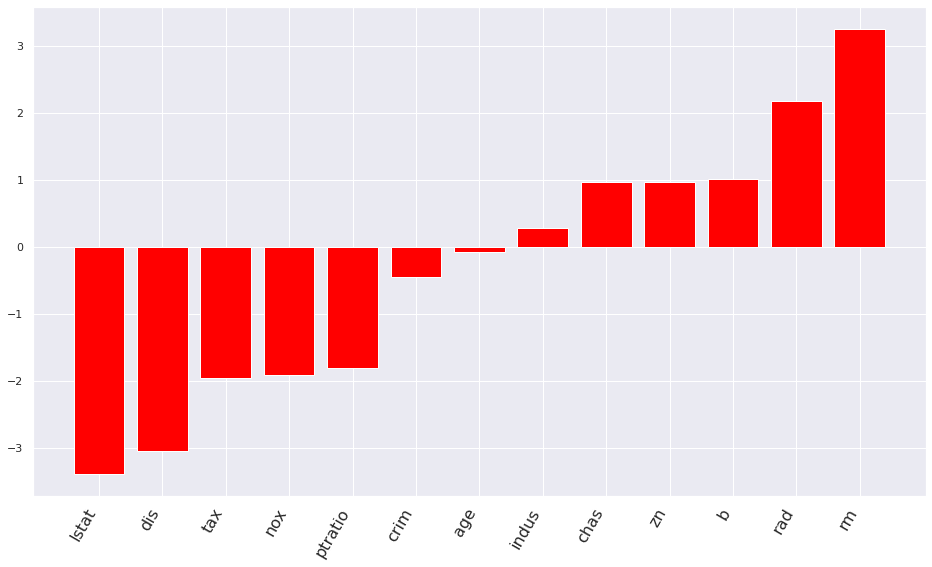

In [ ]:
visualize_coefficients(model.coef_, X_train.columns)

In [ ]:
LinearRegression()